In [30]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib qt

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((17*24,3), np.float32)
objp[:,:2] = np.mgrid[0:24, 0:17].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('calibration_wide/*.png')

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (24,17), None)

    # If found, add object points, image points
    if ret == True:
        term = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_COUNT, 30, 0.1)
        cv2.cornerSubPix(gray, corners, (5, 5), (-1, -1), term)
        objpoints.append(objp)
        imgpoints.append(corners)
        # Draw and display the corners
        cv2.drawChessboardCorners(img, (24,17), corners, ret)
        #write_name = 'corners_found'+str(idx)+'.jpg'
        #cv2.imwrite(write_name, img)
        cv2.imshow('img', img)
        cv2.waitKey(500)

cv2.destroyAllWindows()

In [80]:
import pickle
%matplotlib inline

# Test undistortion on an image
img = cv2.imread('calibration_wide/texture.pngframe_210camera_LF0_Cam004.png')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
print("Camera matrix : \n")
print(mtx)
print("dist : \n")
print(dist)
print("rvecs : \n")
print(rvecs)
print("tvecs : \n")
print(tvecs)

#taking the distortion parameters of a go pro camera(for fisheye distortion and intensifying it by 100 times)
dist = np.array([[-2.57614020e-01, 8.77086999e-02, -2.56970803e-04, -5.93390389e-04, -1.52194091e-02]])
dist=np.multiply(dist, -100)
print("modified dist : \n")
print (dist)

Camera matrix : 

[[3.08566357e+03 0.00000000e+00 5.39413699e+02]
 [0.00000000e+00 3.08567081e+03 5.39008046e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
dist : 

[[-2.54840473e-03  1.97612904e-01 -2.39203775e-05 -1.00048356e-05
  -4.85483415e+00]]
rvecs : 

[array([[ 0.2179639 ],
       [-0.1947374 ],
       [ 0.02753927]]), array([[ 1.20674037],
       [-0.14353083],
       [ 2.36448393]]), array([[-1.29651063],
       [-0.20085895],
       [-2.36130034]]), array([[0.12586756],
       [0.2399591 ],
       [2.69971441]]), array([[ 0.5284599 ],
       [-0.21140507],
       [ 0.33418931]]), array([[-0.0600768 ],
       [-0.34363551],
       [ 3.06287342]]), array([[-0.31980238],
       [ 0.20402646],
       [-0.19471796]]), array([[-0.85130162],
       [-0.0491966 ],
       [-2.4986866 ]]), array([[0.64568742],
       [0.31201826],
       [2.51212465]]), array([[-0.4133307 ],
       [-0.05771115],
       [-0.08896696]]), array([[-0.9817305 ],
       [-0.2553015 ],
       [-2.52

Text(0.5, 1.0, 'Distorted Image')

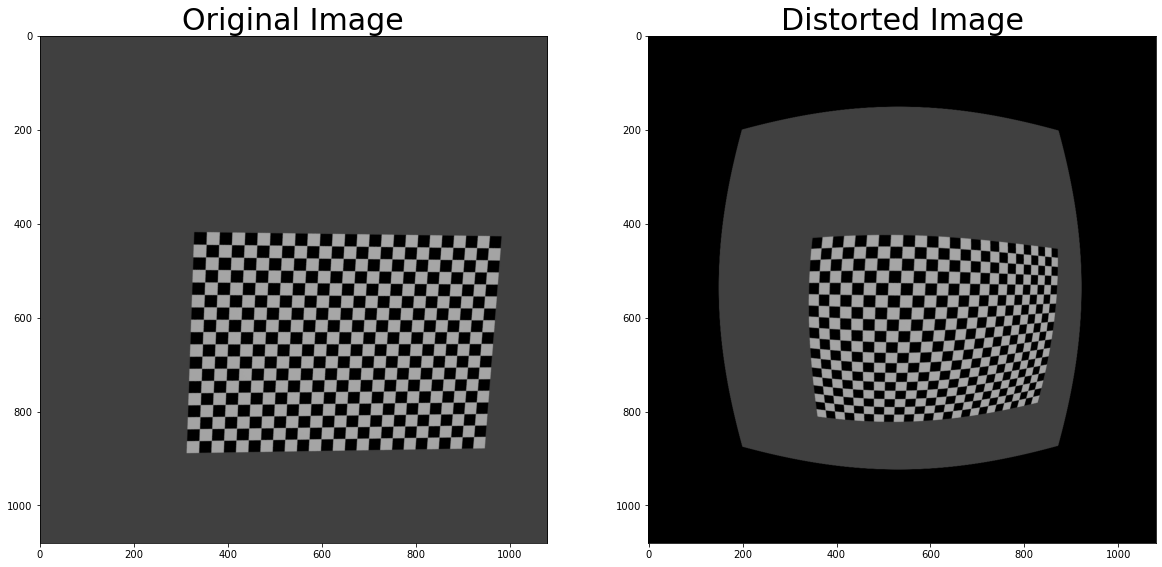

In [81]:
dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('calibration_wide/test_undist.png',dst)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "calibration_wide/wide_dist_pickle.p", "wb" ) )
#dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Distorted Image', fontsize=30)